# Part I Import packages and data

In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

In [2]:
# Basic libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data provessing and machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

In [4]:
data = pd.read_csv('Churn_Modelling.csv')
# Remove irrelevant features
data = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Summary statistics
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Defined variables

# Color
DarkBlue = "#24477F"
LightBlue = "#00AEEF"
White = "#FFFFFF"
Black = "#000000"
MediumBlue = "#005EB8"
SkyBlue = "#7EC8E3"
Orange = "#EF7C00"

# Part II Exploratory data analysis

In [7]:
# Check missing value
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

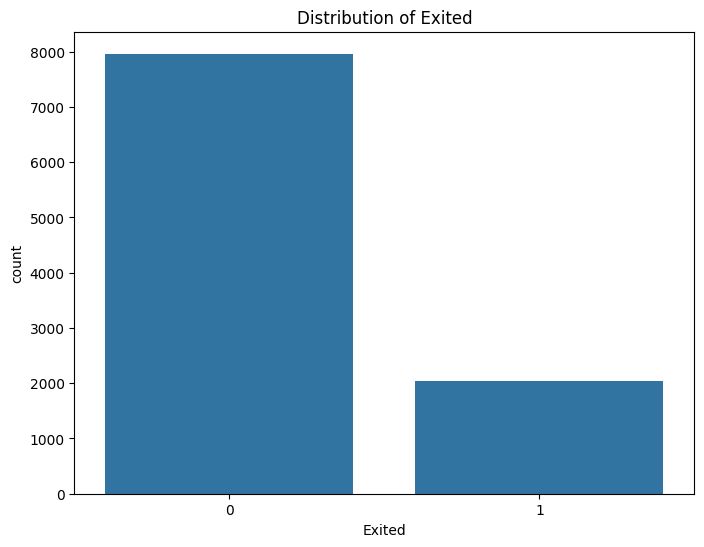

In [8]:
# Distribution of the target variable 'Exited'
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Exited')
plt.show()

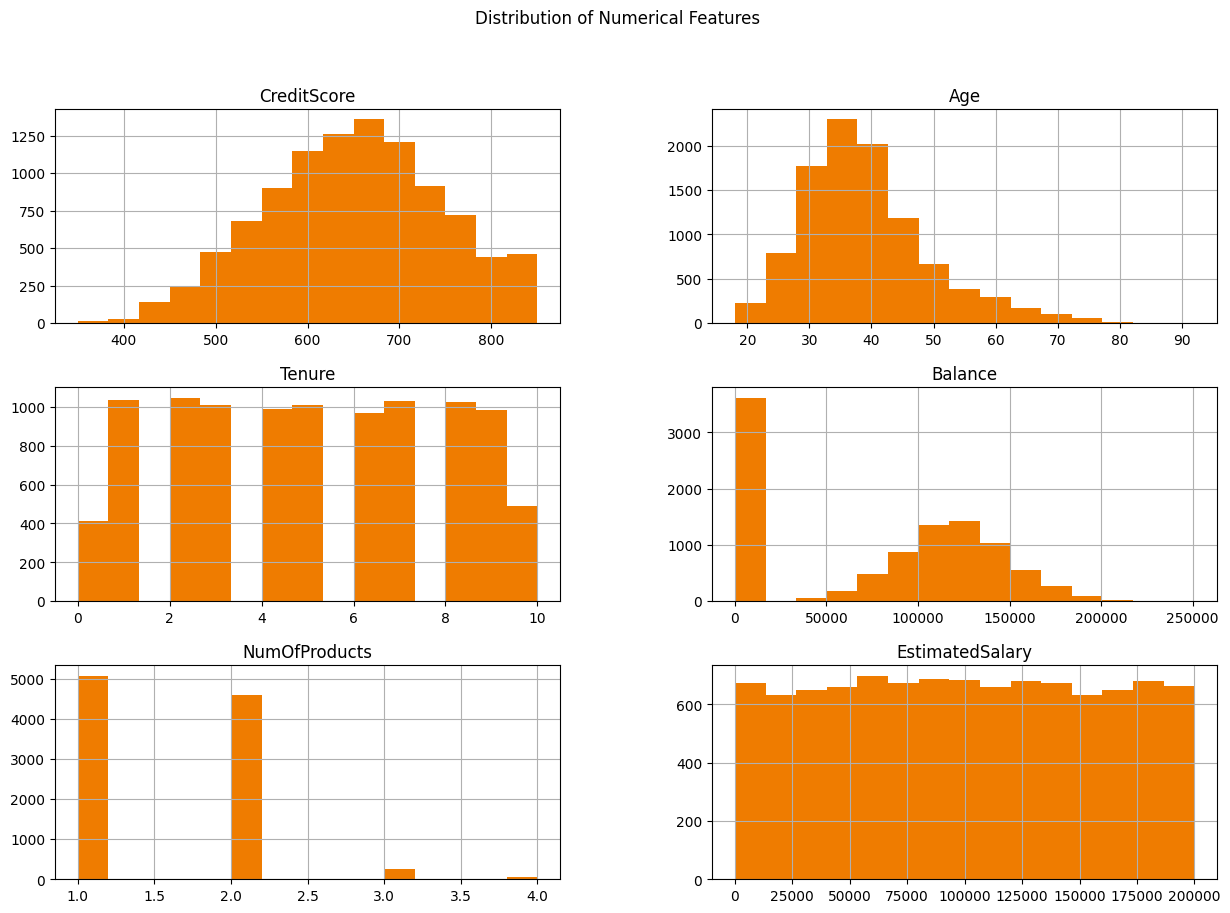

In [9]:
# Distribution of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 2), color = Orange)
plt.suptitle('Distribution of Numerical Features')
plt.show()

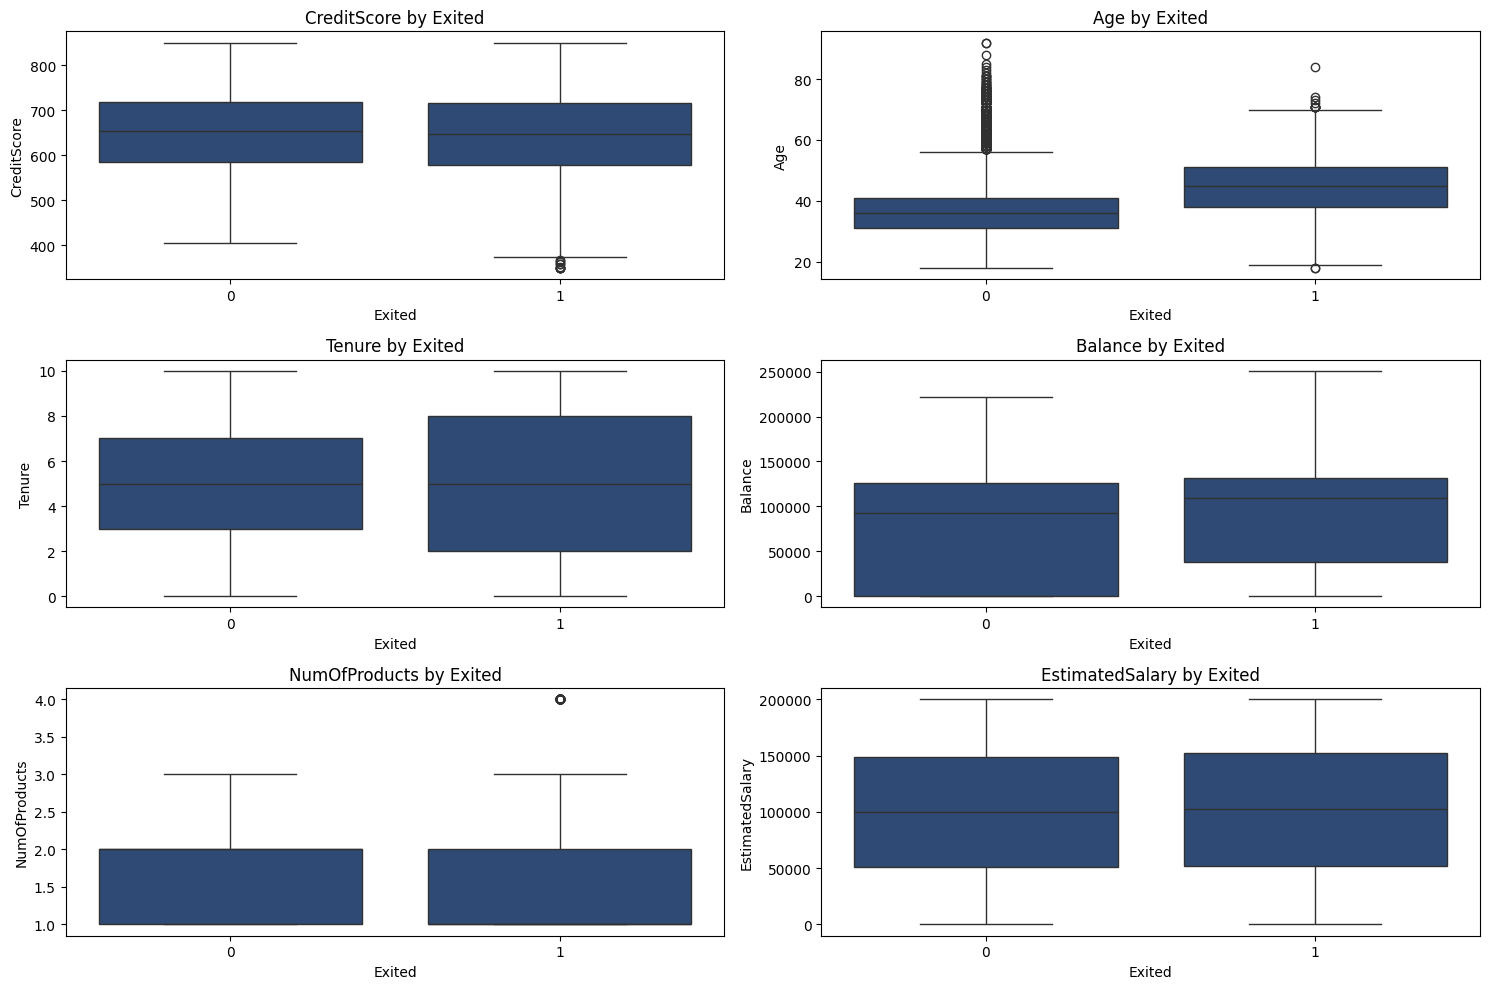

In [10]:
# Boxplots of numerical features by target variable 'Exited'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Exited', y=feature, data=data, color = DarkBlue)
    plt.title(f'{feature} by Exited')
plt.tight_layout()
plt.show()

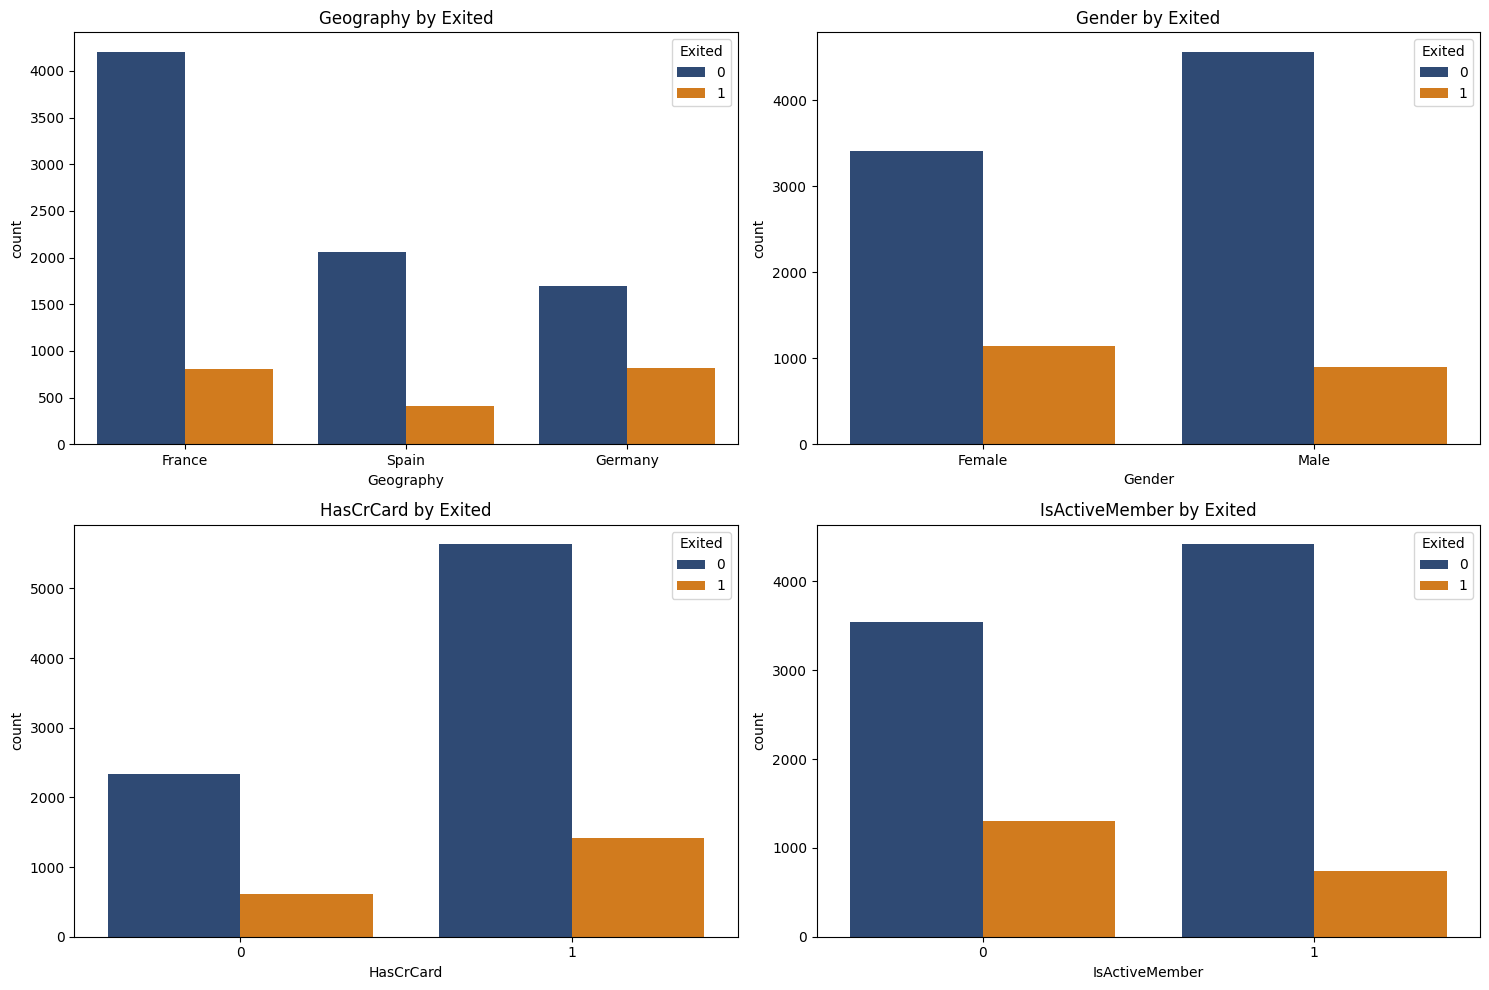

In [11]:
# Countplots of categorical features by target variable 'Exited'
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(15, 10))

palette = {
    0: DarkBlue,
    1: Orange
}

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='Exited', data=data, palette = palette)
    plt.title(f'{feature} by Exited')
plt.tight_layout()
plt.show()

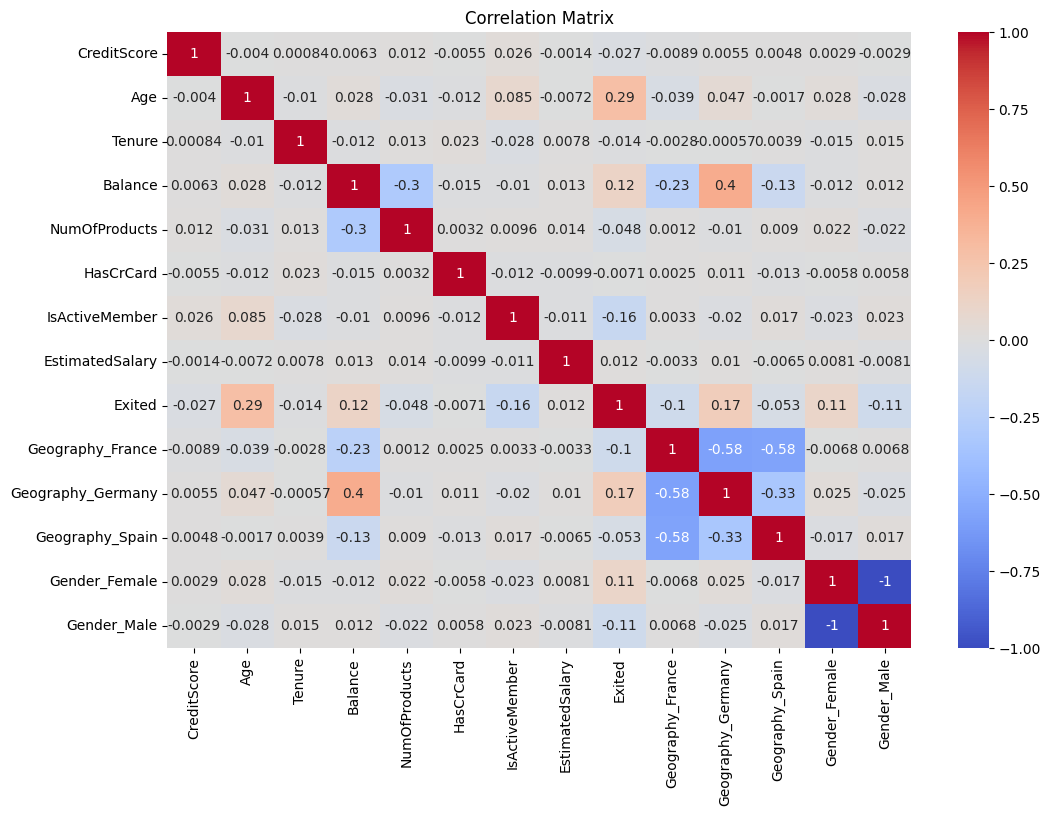

In [12]:
numerical_data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=False)

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Part III Data preprocessing

In [13]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


# Part IV (1) Catboost - Basline

In [15]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier

# Step 1: Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Step 2: Preprocess the data
# Drop irrelevant columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the dataset
scaler = StandardScaler()

# Fit scaler to training data
X_train = scaler.fit_transform(X_train)

# Transform validation and test sets
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 3: Train the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=100,         # Number of boosting iterations
    depth=6,                # Depth of the tree
    learning_rate=0.1,      # Step size for weight updates
    verbose=0               # Suppress training output
)

# Fit the model on the original training data
catboost_model.fit(X_train, y_train)

# Step 4: Evaluate the model
# Predict on the test set
y_pred = catboost_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
print("\nFeature Importance:")
feature_importance = catboost_model.get_feature_importance()
for i, feature in enumerate(data.columns[:-1]):
    print(f"{feature}: {feature_importance[i]}")

# Optional: Save the model
catboost_model.save_model("catboost_model.cbm")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1570
           1       0.81      0.49      0.61       430

    accuracy                           0.86      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000

Confusion Matrix:
[[1520   50]
 [ 220  210]]

Feature Importance:
CreditScore: 2.519498865322977
Gender: 2.7726154359725705
Age: 25.00573377992718
Tenure: 3.051907499867791
Balance: 13.09936597974258
NumOfProducts: 29.82341762920699
HasCrCard: 0.6312008366100471
IsActiveMember: 9.554683765227491
EstimatedSalary: 3.5017006240238993
Exited: 8.958114154472135
Geography_Germany: 1.0817614296263391


# Part IV (2) - Balanced Random Forest

In [16]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier

# Step 1: Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Step 2: Preprocess the data
# Drop irrelevant columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the dataset
scaler = StandardScaler()

# Fit scaler to training data
X_train = scaler.fit_transform(X_train)

# Transform validation and test sets
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 3: Train the Balanced Random Forest model
balanced_rf = BalancedRandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=6,           # Maximum depth of each tree
    random_state=42        # Seed for reproducibility
)

# Fit the model on the training data
balanced_rf.fit(X_train, y_train)

# Step 4: Evaluate the model
# Predict on the test set
y_pred = balanced_rf.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 5: Feature Importance
print("\nFeature Importance:")
feature_importance = balanced_rf.feature_importances_
for i, feature in enumerate(data.columns[:-1]):
    print(f"{feature}: {feature_importance[i]}")

# Optional: Save the model
import joblib
joblib.dump(balanced_rf, "balanced_random_forest_model.pkl")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1570
           1       0.51      0.77      0.61       430

    accuracy                           0.79      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.79      0.81      2000

Confusion Matrix:
[[1256  314]
 [ 101  329]]

Feature Importance:
CreditScore: 0.03851690836902879
Gender: 0.01973425191493634
Age: 0.39890187557923534
Tenure: 0.02403197545918209
Balance: 0.08879428577073478
NumOfProducts: 0.2315067821635813
HasCrCard: 0.004921114470394489
IsActiveMember: 0.07615951452253328
EstimatedSalary: 0.04219651869135072
Exited: 0.06636878479529613
Geography_Germany: 0.008867988263726544


['balanced_random_forest_model.pkl']

# Part IV (3) - Undersampling

In [17]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Step 2: Preprocess the data
# Drop irrelevant columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply RandomUnderSampler to the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Standardize the dataset
scaler = StandardScaler()

# Fit scaler to resampled training data
X_train_resampled = scaler.fit_transform(X_train_resampled)

# Transform validation and test sets
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 3: Train the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=100,         # Number of boosting iterations
    depth=6,                # Depth of the tree
    learning_rate=0.1,      # Step size for weight updates
    verbose=0               # Suppress training output
)

# Fit the model on the undersampled training data
catboost_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate the model
# Predict on the test set
y_pred = catboost_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
print("\nFeature Importance:")
feature_importance = catboost_model.get_feature_importance()
for i, feature in enumerate(data.columns[:-1]):
    print(f"{feature}: {feature_importance[i]}")

# Optional: Save the model
catboost_model.save_model("catboost_model.cbm")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1570
           1       0.52      0.77      0.62       430

    accuracy                           0.80      2000
   macro avg       0.73      0.79      0.74      2000
weighted avg       0.84      0.80      0.81      2000

Confusion Matrix:
[[1269  301]
 [  98  332]]

Feature Importance:
CreditScore: 5.1472405837959725
Gender: 3.3476432388575406
Age: 25.234157738204374
Tenure: 3.0532921906473867
Balance: 10.869041343782257
NumOfProducts: 31.370629987542657
HasCrCard: 0.6849477930341442
IsActiveMember: 8.653331322900891
EstimatedSalary: 4.162263191405044
Exited: 6.758714068005989
Geography_Germany: 0.7187385418237131


# Part IV (4) Catboost - Oversampling

In [18]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler

# Step 1: Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Step 2: Preprocess the data
# Drop irrelevant columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply RandomOverSampler to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Standardize the entire dataset as per original preprocessing
scaler = StandardScaler()

# Fit scaler to resampled training data
X_train_resampled = scaler.fit_transform(X_train_resampled)

# Transform validation and test sets
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 3: Train the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=100,         # Number of boosting iterations
    depth=6,                # Depth of the tree
    learning_rate=0.1,      # Step size for weight updates
    verbose=0               # Suppress training output
)

# Fit the model on resampled training data
catboost_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate the model
# Predict on the test set
y_pred = catboost_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1570
           1       0.57      0.77      0.65       430

    accuracy                           0.83      2000
   macro avg       0.75      0.80      0.77      2000
weighted avg       0.85      0.83      0.83      2000

Confusion Matrix:
[[1322  248]
 [ 101  329]]


In [19]:
# Step 5: Feature Importance (Optional)
print("\nFeature Importance:")
feature_importance = catboost_model.get_feature_importance()
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importance[i]}")


Feature Importance:
CreditScore: 3.4910820695550675
Gender: 3.396344029601009
Age: 23.558525936331733
Tenure: 3.350191278880935
Balance: 12.95261558138468
NumOfProducts: 29.378488689785005
HasCrCard: 1.1744380761872337
IsActiveMember: 8.786157643628144
EstimatedSalary: 4.727414136906543
Geography_Germany: 7.13401496337612
Geography_Spain: 2.050727594363528


# Part V Hyperparameter Tuning using Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'iterations': [50, 100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=0)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

# Perform grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Refit the best model
best_catboost_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_catboost_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'depth': 8, 'iterations': 200, 'learning_rate': 0.2}
Best F1 Score: 0.9331739153526062

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1570
           1       0.65      0.61      0.63       430

    accuracy                           0.85      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.84      0.85      0.84      2000



In [21]:
from sklearn.metrics import log_loss

# Assuming y_val contains actual validation labels and y_val_pred_prob has predicted probabilities
val_loss = log_loss(y_val, best_catboost_model.predict_proba(X_val))
print("Validation Log Loss:", val_loss)

Validation Log Loss: 0.421115458483664


In [22]:
test_loss = log_loss(y_test, best_catboost_model.predict_proba(X_test))
print("Test Log Loss:", test_loss)

Test Log Loss: 0.4026594784496439


In [23]:
# Convert scaled NumPy array back to DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Part VI SHAP

In [24]:
print(type(X_test))  # This should tell us if X_test is still a numpy array

<class 'pandas.core.frame.DataFrame'>


Global SHAP Values (Exact Feature Importance):
              Feature  Mean Absolute SHAP
2                 Age            1.414673
5       NumOfProducts            1.209196
7      IsActiveMember            0.765680
4             Balance            0.582381
1              Gender            0.407367
8     EstimatedSalary            0.359370
9   Geography_Germany            0.347981
0         CreditScore            0.340278
3              Tenure            0.252399
6           HasCrCard            0.142031
10    Geography_Spain            0.122725
Generating SHAP Summary Plot (Validation Set):


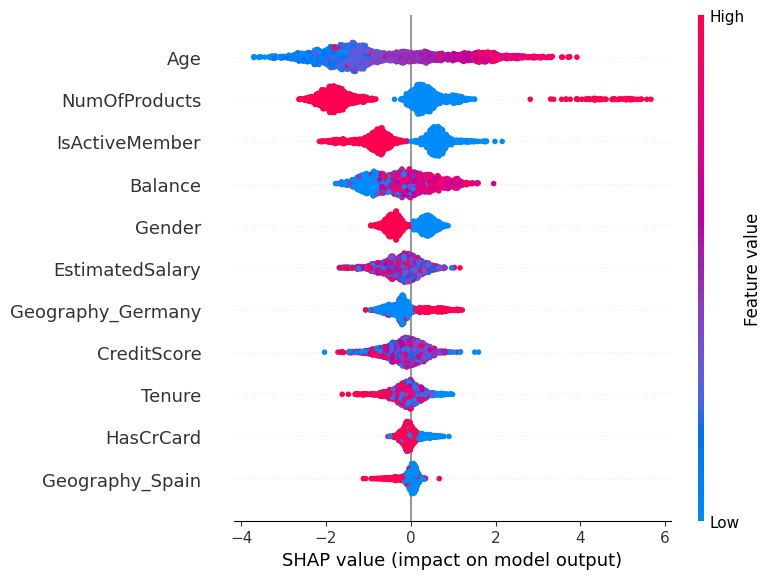

Generating SHAP Bar Chart (Global Interpretation):


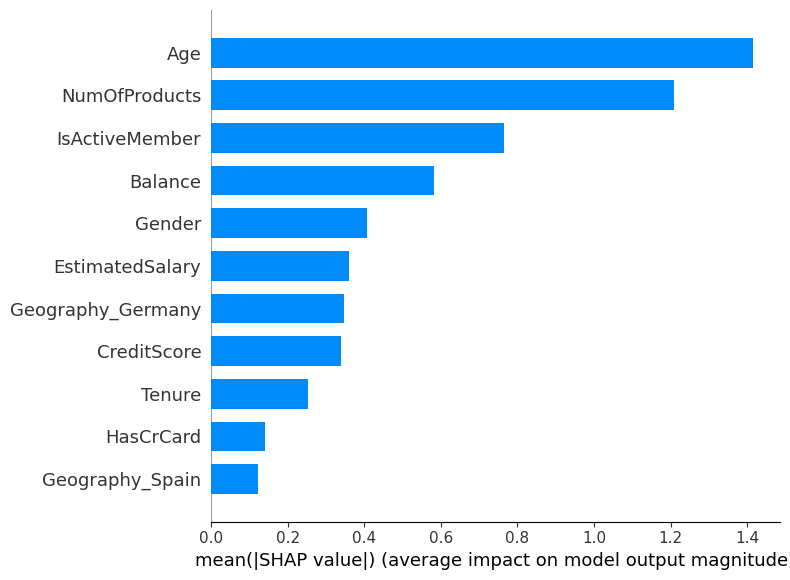

Generating SHAP Force Plot (Local Interpretation)...


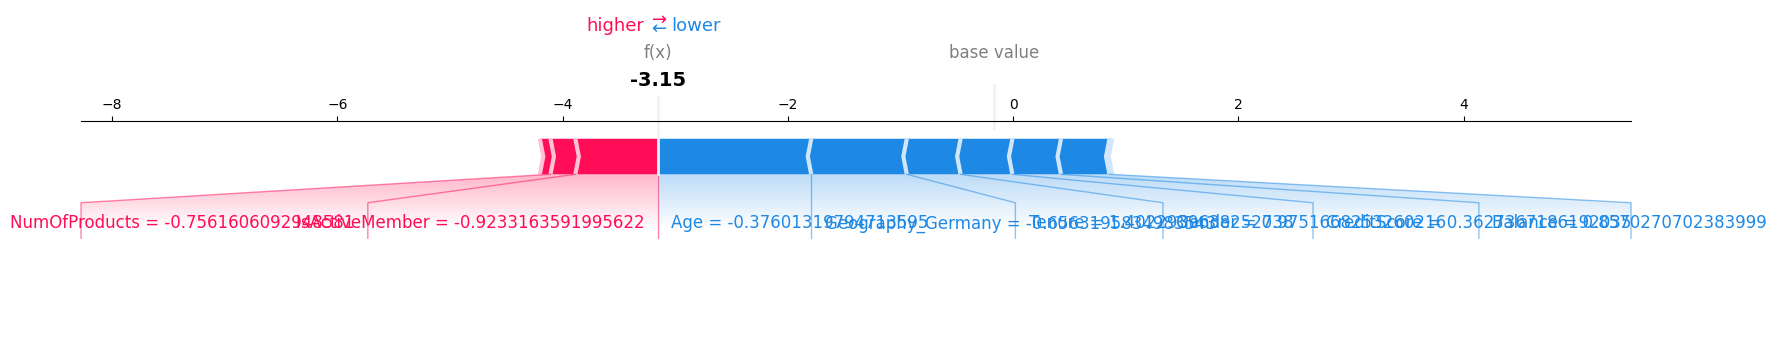

In [25]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure X_test is in a DataFrame for column access (if needed)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Step 1: Initialize SHAP TreeExplainer with the best model
explainer = shap.TreeExplainer(best_catboost_model)  # Replace 'best_catboost_model' with grid_search.best_estimator_

# Step 2: Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)  # SHAP values for all instances in X_test

# Step 3: Global SHAP Value Calculation
# Compute mean absolute SHAP values for each feature
global_shap_values = pd.DataFrame({
    'Feature': X_test_df.columns,  # Ensure proper feature names
    'Mean Absolute SHAP': np.abs(shap_values).mean(axis=0)  # Mean absolute SHAP values
}).sort_values(by='Mean Absolute SHAP', ascending=False)

# Display the global SHAP values as a DataFrame
print("Global SHAP Values (Exact Feature Importance):")
print(global_shap_values)

# Optional: Save global SHAP values to CSV for further analysis
global_shap_values.to_csv("global_shap_values.csv", index=False)

# Step 4: SHAP Summary Plots
print("Generating SHAP Summary Plot (Validation Set):")
shap.summary_plot(shap_values, X_test_df)

# Generate a bar chart for global SHAP values
print("Generating SHAP Bar Chart (Global Interpretation):")
shap.summary_plot(shap_values, X_test_df, plot_type="bar")

# Step 5: Local Interpretation for a Single Prediction
print("Generating SHAP Force Plot (Local Interpretation)...")
# Choose an index from the test set for local interpretation
index = 0  # Example: First test sample

shap.force_plot(
    base_value=explainer.expected_value,  # Scalar base value for binary classification
    shap_values=shap_values[index],       # SHAP values for the selected instance
    features=X_test_df.iloc[index],       # Feature values for the selected instance
    feature_names=X_test_df.columns.tolist(),
    matplotlib=True  # Use Matplotlib for visualization
)


# Visualization

In [26]:
import pandas as pd

# Define the model names
models = [
    "Baseline Catboost",
    "Random Oversampling",
    "Random Undersampling",
    "Balanced Random Forest"
]

# Define the results for each model
results = {
    "F1 Score": [0.5942, 0.9320, 0.7776, 0.7776],
    "Recall": [0.51, 0.61, 0.72, 0.72], 
    "Accuracy": [0.86, 0.85, 0.82, 0.82],
    "Macro Avg": [0.73, 0.76, 0.78, 0.78],
    "Weighted Avg": [0.85, 0.85, 0.83, 0.83]
}

# Create the DataFrame
results_df = pd.DataFrame(results, index=models)

# Display the table
print("Comparison Table:")
print(results_df)

# Optional: Save the table to a CSV file
results_df.to_csv("model_comparison_with_recall.csv", index=True)

Comparison Table:
                        F1 Score  Recall  Accuracy  Macro Avg  Weighted Avg
Baseline Catboost         0.5942    0.51      0.86       0.73          0.85
Random Oversampling       0.9320    0.61      0.85       0.76          0.85
Random Undersampling      0.7776    0.72      0.82       0.78          0.83
Balanced Random Forest    0.7776    0.72      0.82       0.78          0.83


In [27]:
import pandas as pd

# Define the SHAP values (global and local) as dictionaries
global_shap_values = {
    'CreditScore': 0.3529,
    'Gender': 0.4123,
    'Age': 1.7385,
    'Tenure': 0.2527,
    'Balance': 0.5719,
    'NumOfProducts': 1.2354,
    'HasCrCard': 0.1364,
    'IsActiveMember': 0.7150,
    'EstimatedSalary': 0.3658,
    'Geography_Germany': 0.3111,
    'Geography_Spain': 0.1170
}

local_shap_values = {
    'CreditScore': -0.1823,
    'Gender': -0.5403,
    'Age': -1.6710,
    'Tenure': -0.2981,
    'Balance': -0.2603,
    'NumOfProducts': 0.3742,
    'HasCrCard': 0.0917,
    'IsActiveMember': 0.7605,
    'EstimatedSalary': -0.1137,
    'Geography_Germany': -0.6042,
    'Geography_Spain': 0.0033
}

# Combine into a DataFrame
shap_comparison_df = pd.DataFrame({
    'Feature': global_shap_values.keys(),
    'Global SHAP Value': global_shap_values.values(),
    'Local SHAP Value': local_shap_values.values()
})

# Display the DataFrame
print(shap_comparison_df)


              Feature  Global SHAP Value  Local SHAP Value
0         CreditScore             0.3529           -0.1823
1              Gender             0.4123           -0.5403
2                 Age             1.7385           -1.6710
3              Tenure             0.2527           -0.2981
4             Balance             0.5719           -0.2603
5       NumOfProducts             1.2354            0.3742
6           HasCrCard             0.1364            0.0917
7      IsActiveMember             0.7150            0.7605
8     EstimatedSalary             0.3658           -0.1137
9   Geography_Germany             0.3111           -0.6042
10    Geography_Spain             0.1170            0.0033


In [28]:
import pandas as pd

# Create the data for the table
data = {
    "MODEL": [
        "Baseline Random Forest",
        "Grid-Search Optimized RF",
        "SMOTE-Enhanced RF (Final)",
        "Random Under-Sampling",
        "Balanced Random Forest"
    ],
    "VALIDATION ACCURACY": ["86%", "87%", "83%", "78%", "78%"],
    "MINORITY PRECISION": ["74%", "77%", "54%", "45%", "45%"],
    "MINORITY RECALL": ["44%", "42%", "59%", "72%", "71%"],
    "F1-SCORE (MINORITY)": ["55%", "55%", "56%", "55%", "55%"]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as a table
print(df)

# Optional: Save to an HTML or LaTeX file for further use
# df.to_html("table.html", index=False)
# df.to_latex("table.tex", index=False)

                       MODEL VALIDATION ACCURACY MINORITY PRECISION  \
0     Baseline Random Forest                 86%                74%   
1   Grid-Search Optimized RF                 87%                77%   
2  SMOTE-Enhanced RF (Final)                 83%                54%   
3      Random Under-Sampling                 78%                45%   
4     Balanced Random Forest                 78%                45%   

  MINORITY RECALL F1-SCORE (MINORITY)  
0             44%                 55%  
1             42%                 55%  
2             59%                 56%  
3             72%                 55%  
4             71%                 55%  
